In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.mlab as mlab
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
df= pd.read_csv("../input/framingham-heart-study-dataset/framingham.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

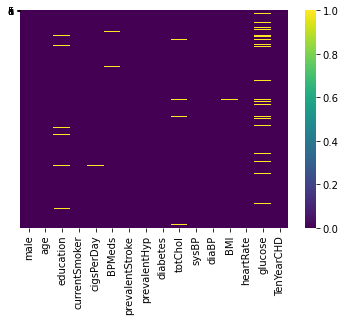

In [7]:
sns.heatmap(df.isnull(),yticklabels ='False' , cmap = 'viridis')

In [8]:
df.shape


(4240, 16)

In [9]:
df.dropna(inplace=True)

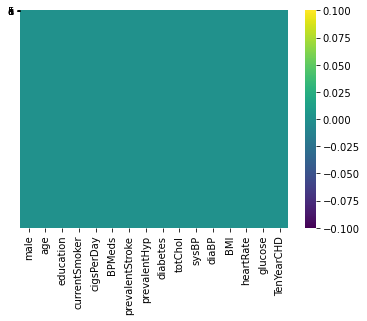

In [10]:
sns.heatmap(df.isnull(),yticklabels ='False' , cmap = 'viridis')

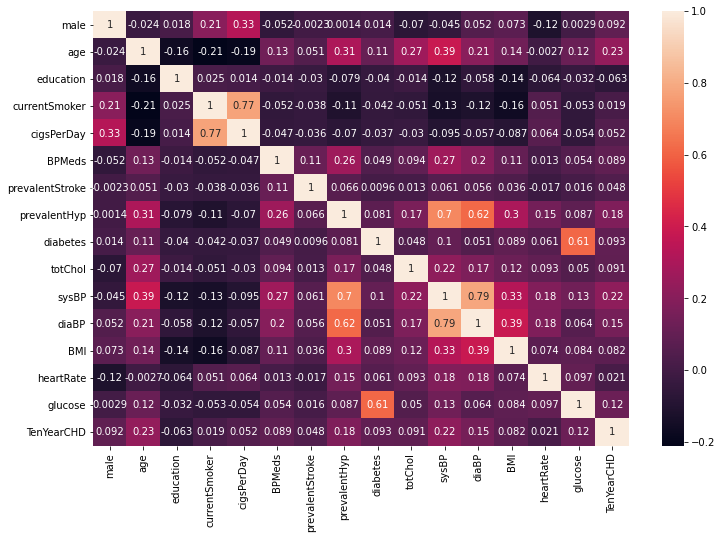

In [11]:
plt.figure(figsize=(12,8))
plot=sns.heatmap(df.corr(), annot= True)

In [12]:
df = df.drop(['education'], axis=1)

In [13]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
columns=['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

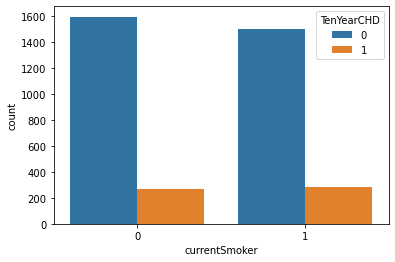

In [15]:
 sns.countplot(x=df['currentSmoker'], hue=df['TenYearCHD'], data=df)

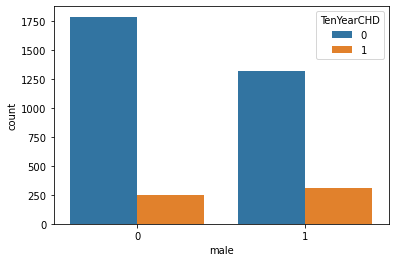

In [16]:
 sns.countplot(x=df['male'], hue=df['TenYearCHD'], data=df)

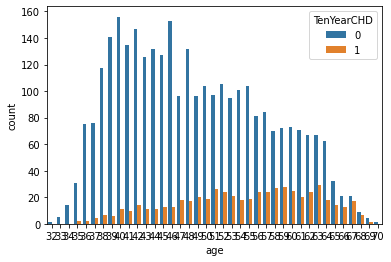

In [17]:
 sns.countplot(x=df['age'], hue=df['TenYearCHD'], data=df)

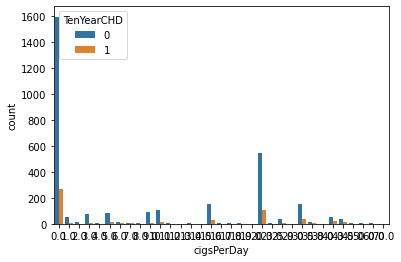

In [18]:
 sns.countplot(x=df['cigsPerDay'], hue=df['TenYearCHD'], data=df)

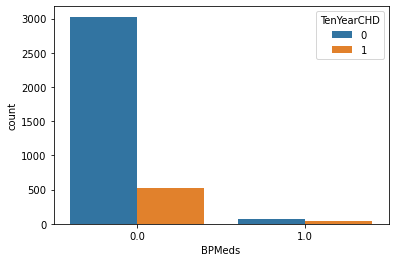

In [19]:
sns.countplot(x=df['BPMeds'], hue=df['TenYearCHD'], data=df)

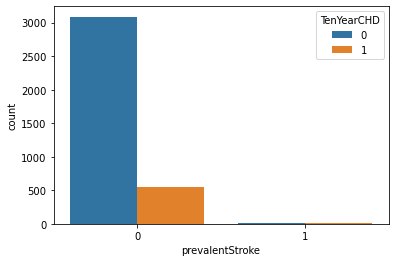

In [20]:
sns.countplot(x=df['prevalentStroke'], hue=df['TenYearCHD'], data=df)

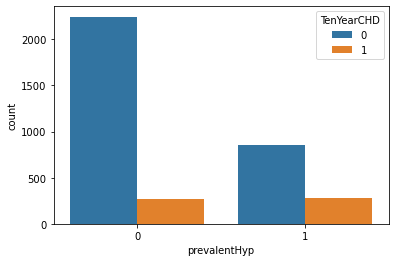

In [21]:
sns.countplot(x=df['prevalentHyp'], hue=df['TenYearCHD'], data=df)

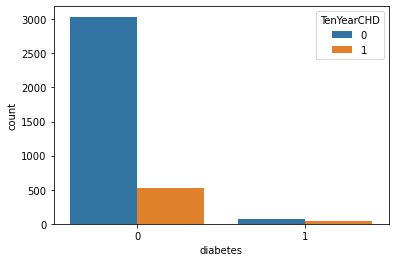

In [22]:
sns.countplot(x=df['diabetes'], hue=df['TenYearCHD'], data=df)

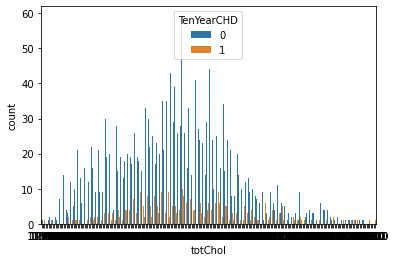

In [23]:
sns.countplot(x=df['totChol'], hue=df['TenYearCHD'], data=df)

In [24]:
#sns.histplot(x=df['age'], hue=df['TenYearCHD'], palette='cubehelix', bins=5)

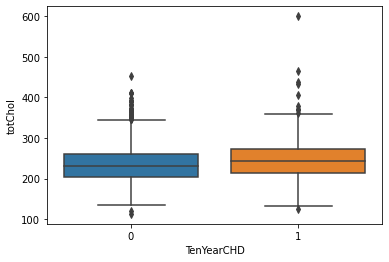

In [25]:
sns.boxplot(y=df['totChol'], x=df['TenYearCHD'])

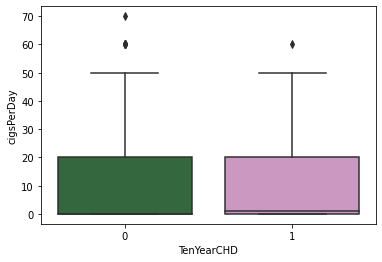

In [26]:
sns.boxplot(y=df['cigsPerDay'], x=df['TenYearCHD'], palette='cubehelix')

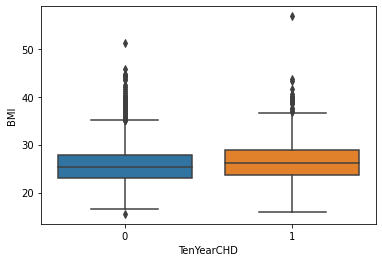

In [27]:
sns.boxplot(y=df['BMI'], x=df['TenYearCHD'])

In [28]:
#sns.histplot(x=df['sysBP'], hue=df['TenYearCHD'], palette='cubehelix', bins=30)

In [29]:
#sns.histplot(x=df['diaBP'], hue=df['TenYearCHD'], palette='cubehelix', bins=30)

In [30]:
#sns.histplot(x=df['heartRate'], hue=df['TenYearCHD'], palette='cubehelix', bins=1)

In [31]:
#sns.histplot(x=df['glucose'], hue=df['TenYearCHD'], palette='cubehelix', bins=40)

In [32]:
df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


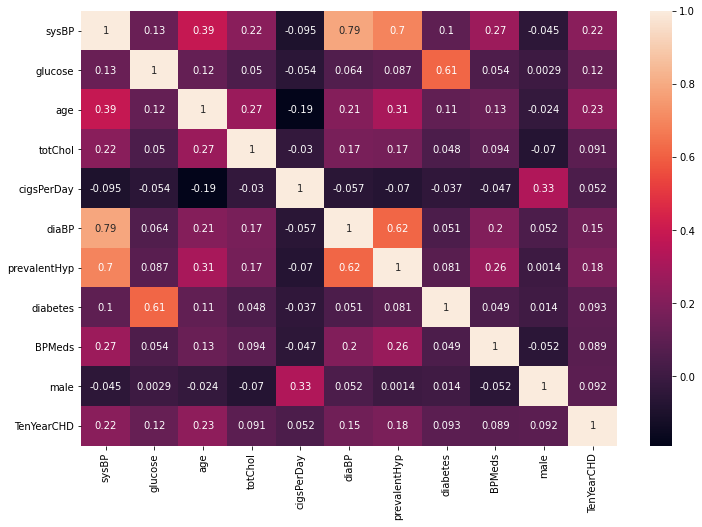

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

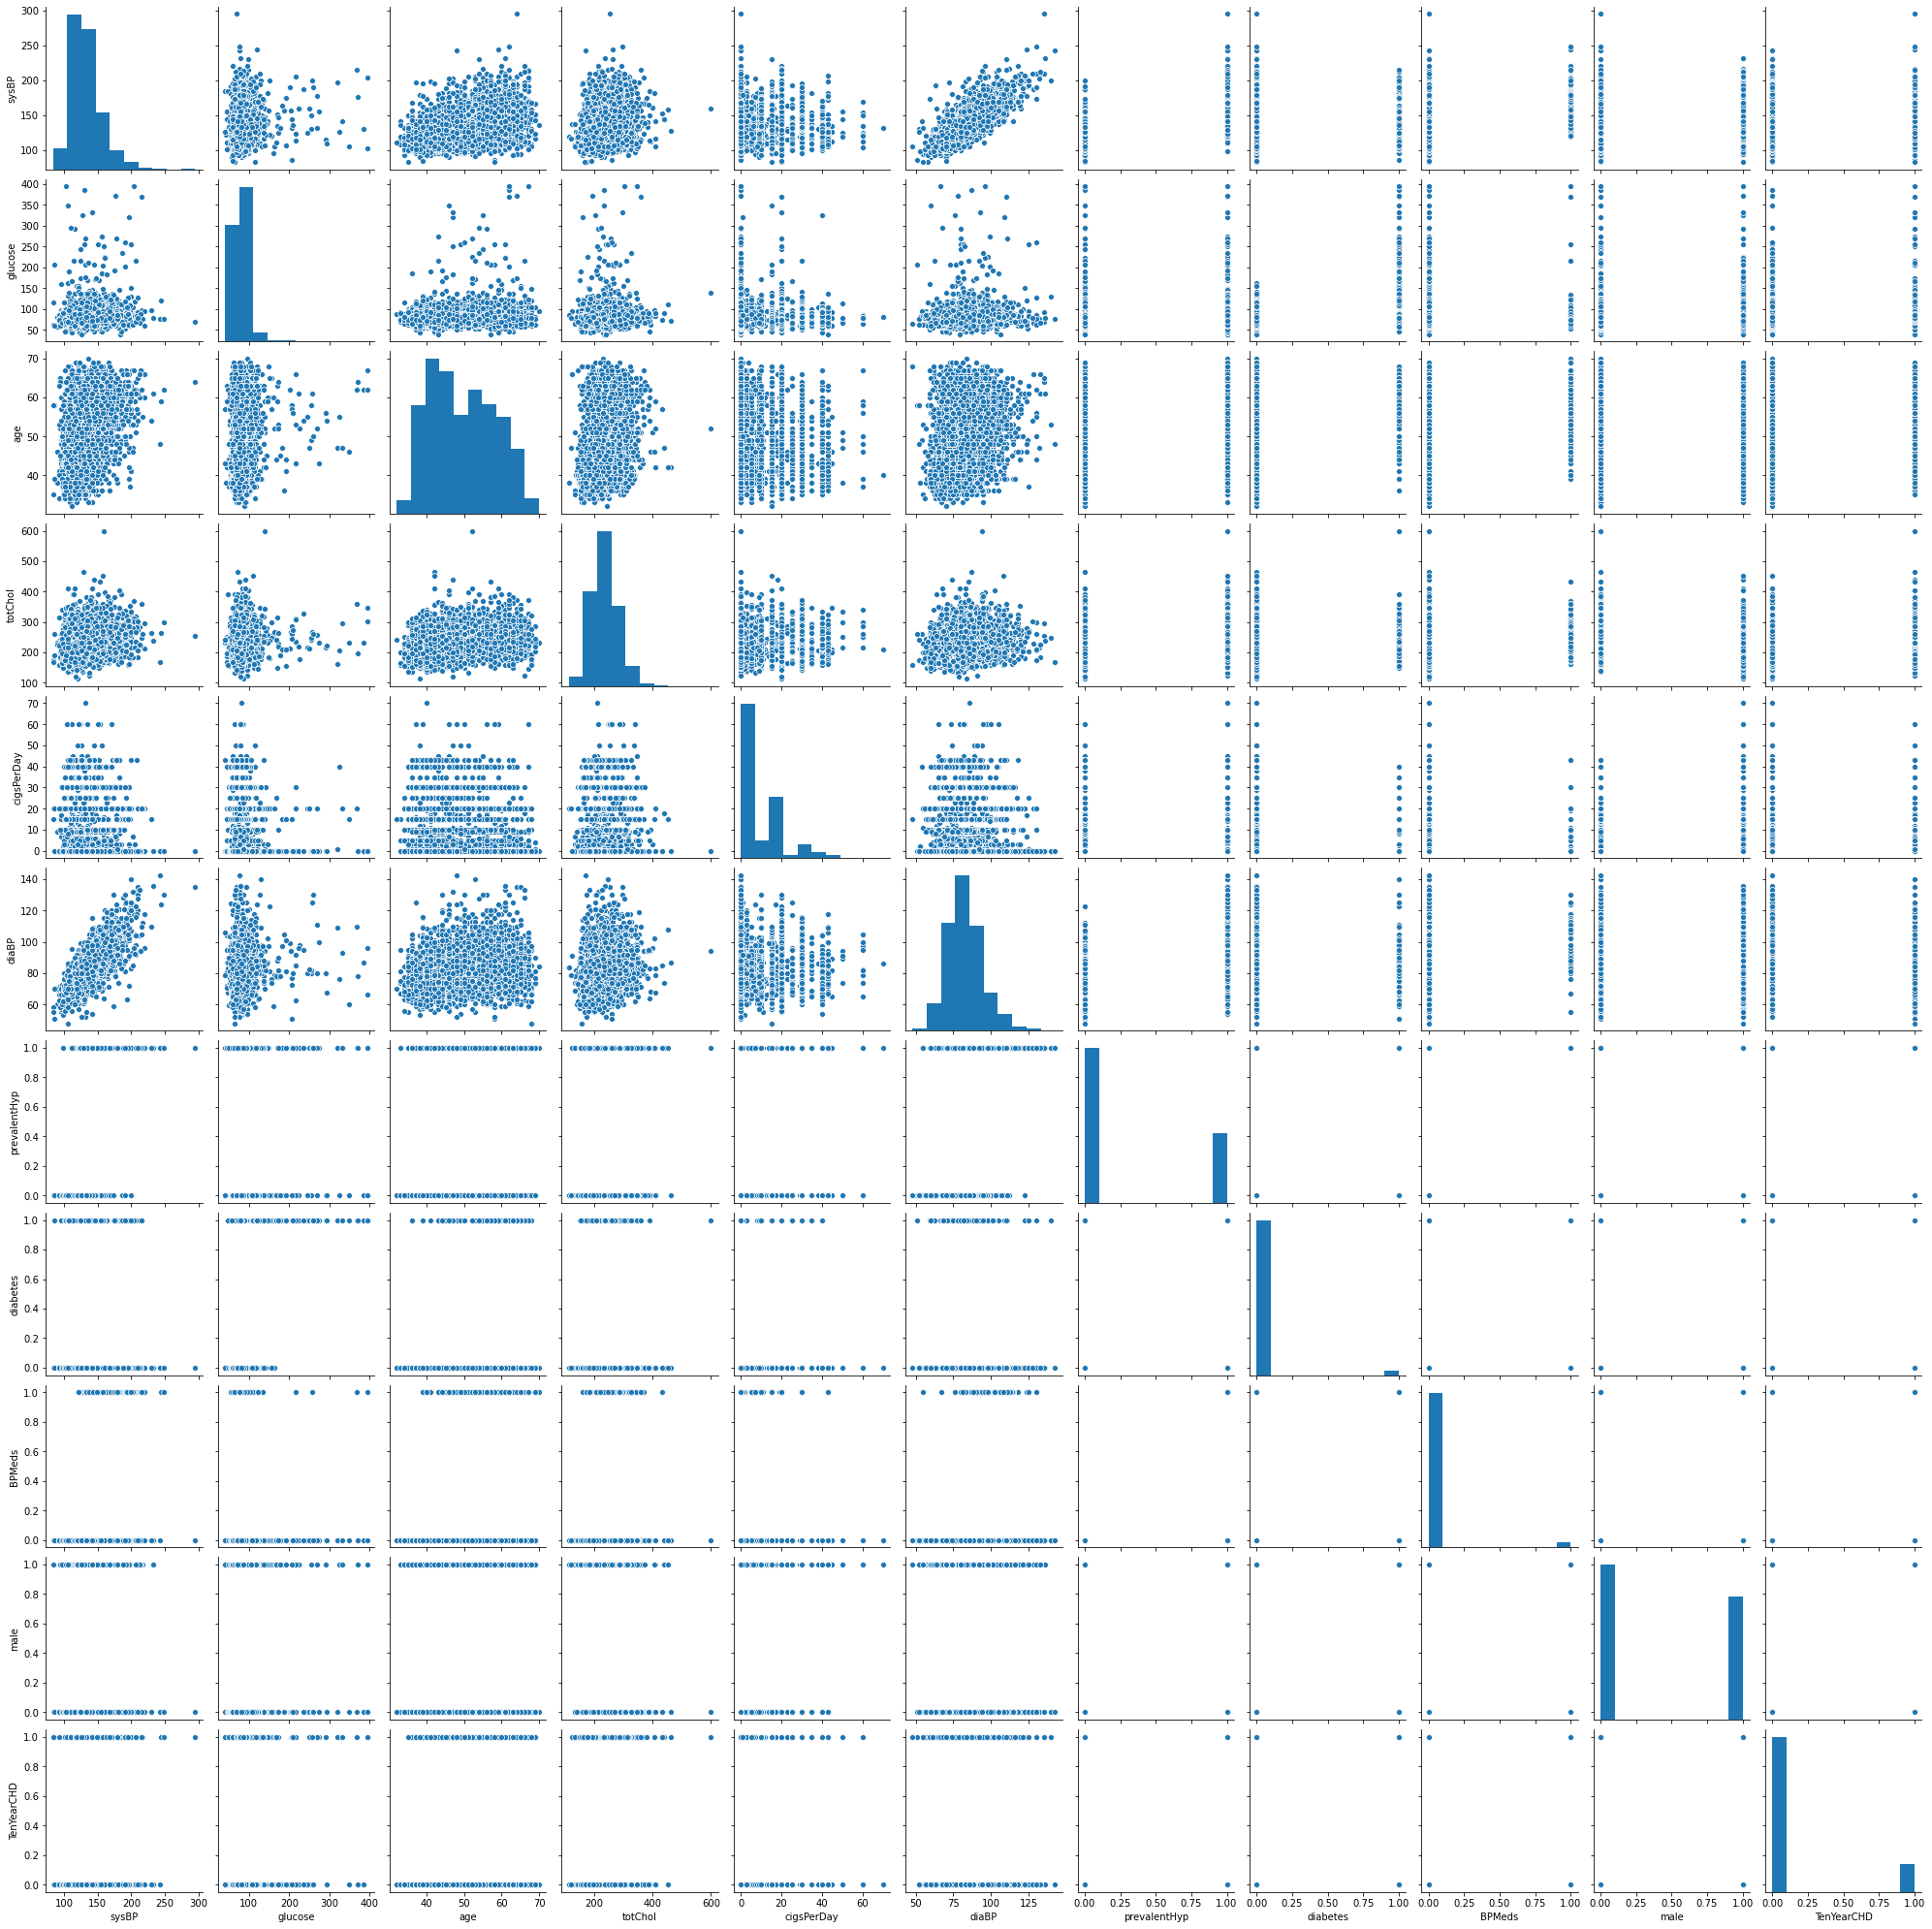

In [34]:
sns.pairplot(df)

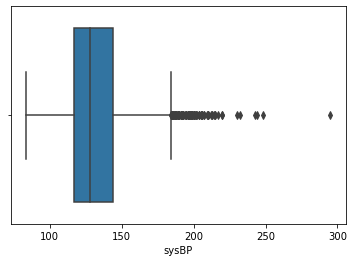

In [35]:
sns.boxplot(x=df['sysBP'])

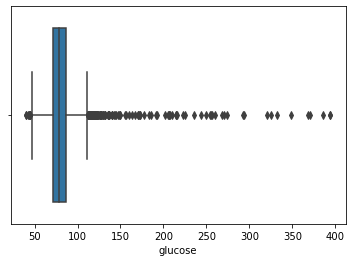

In [36]:
sns.boxplot(x=df['glucose'])

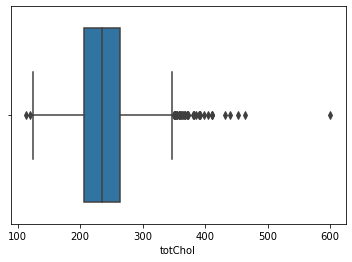

In [37]:
sns.boxplot(x=df['totChol'])

In [38]:
df = df[df['totChol']<599]

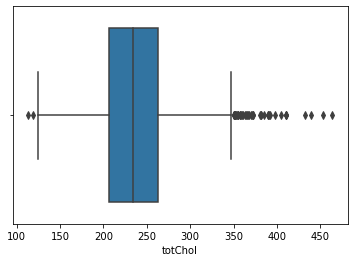

In [39]:
sns.boxplot(x=df['totChol'])

In [40]:
from imblearn.under_sampling import NearMiss

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mn=MinMaxScaler()
df_new=pd.DataFrame(mn.fit_transform(df), columns=df.columns)

In [43]:
df_new.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,0.106383,0.104520,0.184211,0.233618,0.000000,0.232804,0.0,0.0,0.0,1.0,0.0
1,0.177305,0.101695,0.368421,0.390313,0.000000,0.349206,0.0,0.0,0.0,0.0,0.0
2,0.208038,0.084746,0.421053,0.376068,0.285714,0.338624,0.0,0.0,0.0,1.0,0.0
3,0.314421,0.177966,0.763158,0.319088,0.428571,0.497354,1.0,0.0,0.0,0.0,1.0
4,0.219858,0.127119,0.368421,0.490028,0.328571,0.380952,0.0,0.0,0.0,0.0,0.0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df_new.columns

Index(['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP',
       'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'TenYearCHD'],
      dtype='object')

In [46]:
df_new.shape

(3657, 11)

In [47]:
X=df_new.drop(['TenYearCHD'], axis=1)
y=df['TenYearCHD']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [49]:
from sklearn.linear_model import LogisticRegression 

In [50]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
confusion_matrix(y_test, predictions)


array([[600,   1],
       [122,   9]])

In [51]:
print(confusion_matrix)

<function confusion_matrix at 0x7f3cc99f1170>


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       601
           1       0.90      0.07      0.13       131

    accuracy                           0.83       732
   macro avg       0.87      0.53      0.52       732
weighted avg       0.84      0.83      0.77       732



In [53]:
from sklearn.svm import SVC

In [54]:
model = SVC()
model.fit(X_train, y_train)
predictions1 = model.predict(X_test)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test, predictions1))

[[601   0]
 [130   1]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       601
           1       1.00      0.01      0.02       131

    accuracy                           0.82       732
   macro avg       0.91      0.50      0.46       732
weighted avg       0.85      0.82      0.74       732



In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
classifier= KNeighborsClassifier(n_neighbors=8)

In [57]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [58]:
y_pred=classifier.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       601
           1       0.44      0.03      0.06       131

    accuracy                           0.82       732
   macro avg       0.63      0.51      0.48       732
weighted avg       0.76      0.82      0.75       732



In [60]:
print(confusion_matrix(y_test,y_pred))

[[596   5]
 [127   4]]


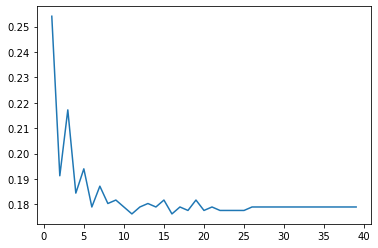

In [61]:
error=[]

for i in range(1,40):
  classifier= KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  pred_i = classifier.predict(X_test)
  error.append(np.mean(pred_i!=y_test))
  
plt.plot(range(1,40), error)


In [62]:
classifier= KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       601
           1       0.50      0.04      0.07       131

    accuracy                           0.82       732
   macro avg       0.66      0.51      0.49       732
weighted avg       0.77      0.82      0.75       732

[[596   5]
 [126   5]]


In [63]:
nm = NearMiss()
X_res, y_res = nm.fit_sample(X,y)

In [64]:
X_res.shape

(1112, 10)

In [65]:
y_res.shape

(1112,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=29)

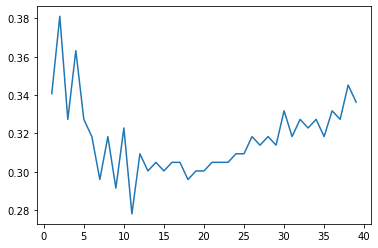

In [67]:
error=[]

for i in range(1,40):
  classifier= KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  pred_i = classifier.predict(X_test)
  error.append(np.mean(pred_i!=y_test))
  
plt.plot(range(1,40), error)


In [68]:
classifier= KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.91      0.76       105
           1       0.88      0.55      0.68       118

    accuracy                           0.72       223
   macro avg       0.76      0.73      0.72       223
weighted avg       0.77      0.72      0.71       223

[[96  9]
 [53 65]]


In [69]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")
precision = precision_score(y_test, y_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")
recall = recall_score(y_test,y_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 72.2%
The f1 score for KNN is: 67.7%
The precision score for KNN is: 87.8%
The recall score for KNN is: 55.1%


In [70]:
acc_test = classifier.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = classifier.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  72.19730941704036 %
The accuracy score of the training data is:  75.37 %


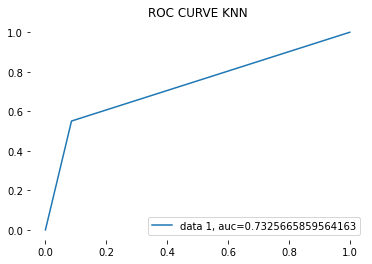

The score for the AUC ROC Curve is: 73.3%


In [71]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")